In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

%matplotlib inline

In [108]:
df = pd.read_csv("KMeansTest1.csv")

In [3]:
#X = np.array(df.drop(['DeviceId',  axis = 1))


In [4]:
from sklearn.cluster import KMeans


In [71]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

pca = PCA()
pca.fit(segmentation_std)

pl.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle= '--')

#kmeans = KMeans(n_clusters= 2, n_init = 50, max_iter = 100000)
#kmeans.fit_predict(X)


ValueError: could not convert string to float: '6e31c493-9645-485d-b5bc-2ccc0f25b397'

In [111]:
df['K-class'] = kmeans.labels_
df

,DeviceId,Latency_fog1,Latency_fog2,Latency_cloud,Service,K-class
0,1,16,7,21,100,0
1,1,1,4,20,100,0
2,7,5,4,21,1000,1
3,7,3,5,20,1000,1
4,7,8,9,22,1000,1
5,1,4,2,22,100,0
6,2,1,4,21,100,0
7,3,10,7,22,100,0
8,3,4,1,24,100,0
9,3,1,9,20,100,0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency', 'Cloud_latency', 'Request_size', 'Regions'])
    
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size', 'Fog_latency', 'Cloud_latency'], axis = 1))

sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

#aplicação do kmeans
kmeans = KMeans(n_clusters= 6, init= 'k-means++',n_init = 10, max_iter = 3000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

3


,Hour,Device_id,Class_of_service,Fog_latency,Cloud_latency,Request_size,Regions,K-class
0,0,046cf2a1-c7d9-4ee6-ac7e-558f2c13e6e8,100,38,134,772,0.680828,2
1,0,1af62bbe-bc7a-4456-b894-609a4e90c041,100,72,105,946,1.265501,2
2,1,a60e0855-cb7f-4fe0-bc7b-2552d97aa664,100,36,118,871,0.605701,2
3,1,2b009b12-0f74-4ac7-bf8d-9786bbcc0b93,10,40,4,889,2.442551,1
4,1,01b81158-cc96-41c9-bff4-7cf102d1cf1c,100,69,120,549,0.097882,2
...,...,...,...,...,...,...,...,...
1389,22,23587827-cc62-438b-8c88-fade1a8dcf85,100,93,51,613,0.603272,2
1390,22,6e456a83-d94e-4eff-a643-61918eb415c6,100,2,47,929,2.016938,5
1391,23,05fd11a3-9668-45d5-a68d-cd5f86bd04ca,100,91,176,320,1.259857,2
1392,23,0df5a56e-fc96-4ded-80fe-7ea8db266835,100,13,49,478,2.256247,5


3


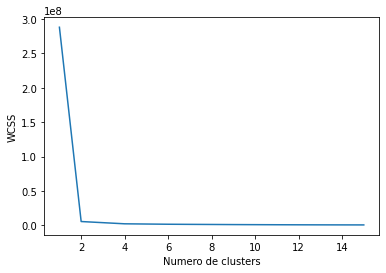

In [16]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss


df = devicesDf




X = np.array(df.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

# scaler = StandardScaler()
# segmentation_std = scaler.fit_transform(df.drop(['Device_id'], axis = 1))

# pca = PCA(n_components = 2)
# pca.fit(segmentation_std)
# score_pca = pca.transform(segmentation_std)

# kmeans = KMeans(n_clusters= 2, init= 'k-means++',n_init = 50, max_iter = 300)
# kmeans.fit_predict(score_pca)
# df['K-class'] = kmeans.labels_
# print(kmeans.score(score_pca))
#df.to_excel("output6.xlsx")



# for i in range(1, 15):
#     kmeans = KMeans(n_clusters= i, init= 'k-means++',n_init = 10, max_iter = 3000)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

pl.plot(range(1, 16), calculate_wcss(X))
pl.xlabel("Numero de clusters")
pl.ylabel("WCSS")

pl.show()

In [2]:
# kmeans = KMeans(n_clusters= 3, init= 'k-means++',n_init = 10, max_iter = 3000)
# kmeans.fit_predict(X)
# kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf.to_excel("output10.xlsx")

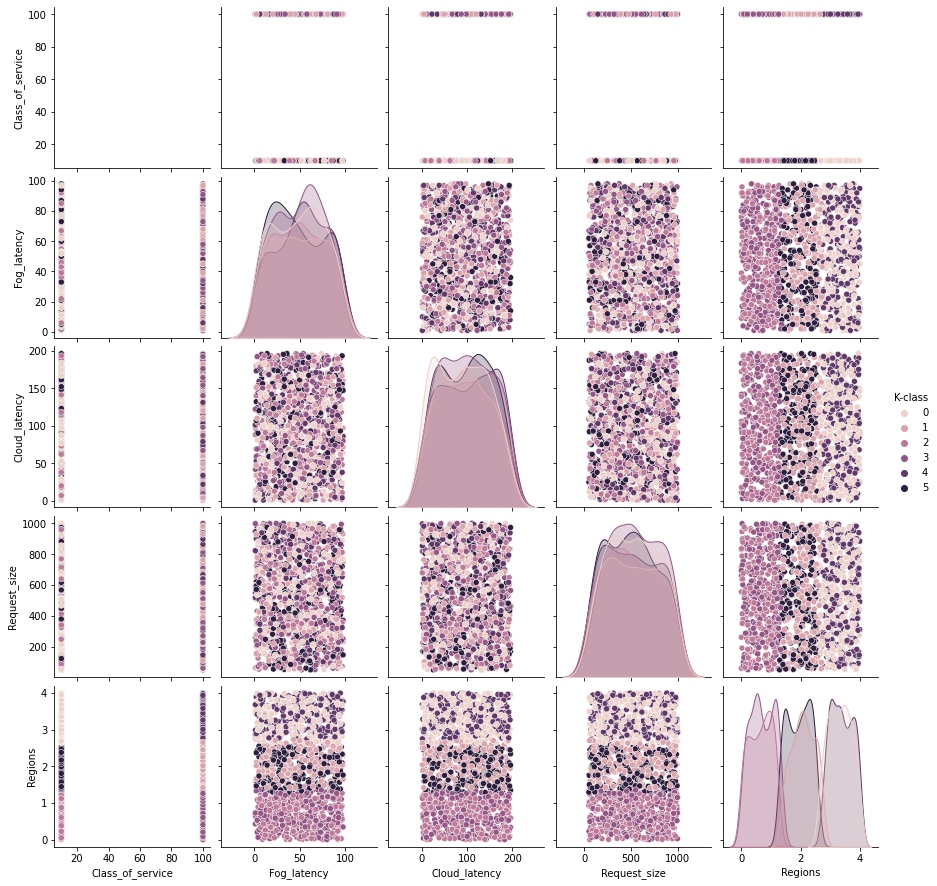

In [33]:
sb.pairplot(devicesDf, hue='K-class')

#df['Regions'].plot(color= 'r', style='.')
#df['Class_of_service'].plot(color= 'b', style='.')


#devicesDf.plot(kind='scatter',x='Fog_latency',y='Regions')
#devicesDf.plot(kind='scatter',x='K-class',y='Regions')

#df.plot(kind='scatter',x='Regions',y='Class_of_service', color='red', ax=ax)

#pl.show()

# df.plot(x ='Regions', y=['Class_of_service'], kind = 'scatter', colo)
# pl.show()


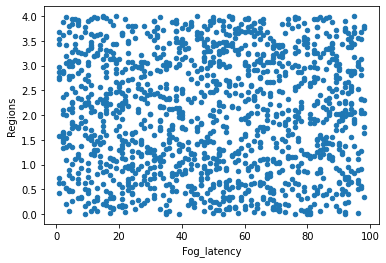

In [ ]:
#sb.pairplot(df, hue='Class_of_service')

#df['Regions'].plot(color= 'r', style='.')
#df['Class_of_service'].plot(color= 'b', style='.')


devicesDf.plot(kind='scatter',x='Fog_latency',y='Regions')
devicesDf.plot(kind='scatter',x='Fog_latency',y='Regions')
#df.plot(kind='scatter',x='Regions',y='Class_of_service', color='red', ax=ax)

pl.show()

# df.plot(x ='Regions', y=['Class_of_service'], kind = 'scatter', colo)
# pl.show()


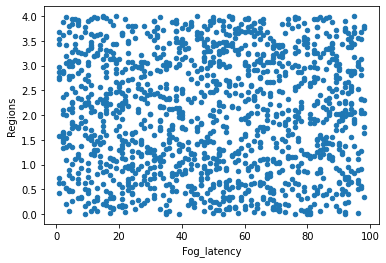

In [ ]:
#sb.pairplot(df, hue='Class_of_service')

#df['Regions'].plot(color= 'r', style='.')
#df['Class_of_service'].plot(color= 'b', style='.')


devicesDf.plot(kind='scatter',x='Fog_latency',y='Regions')
#df.plot(kind='scatter',x='Regions',y='Class_of_service', color='red', ax=ax)

pl.show()

# df.plot(x ='Regions', y=['Class_of_service'], kind = 'scatter', colo)
# pl.show()


CRIAÇÃO DE MÉTODOS DE ANALISE DE CLUSTERS

C:\Users\Gui\AppData\Local\Temp\ipykernel_14148\1461831160.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


Text(0.5, 1.0, 'Gap Statistic vs. K')

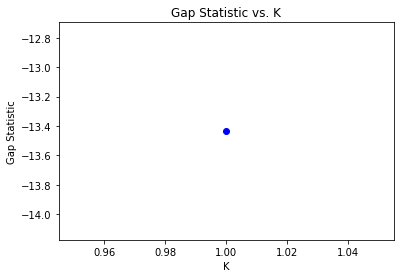

In [22]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            
            randomReference = np.random.random_sample(size=data.shape)
            
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

        return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(X, nrefs=5, maxClusters=30)
pl.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
pl.xlabel('K')
pl.ylabel('Gap Statistic')
pl.title('Gap Statistic vs. K')

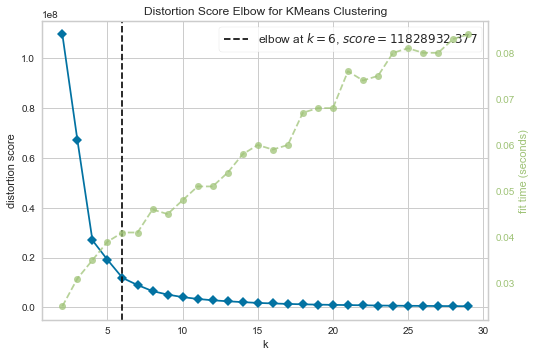

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

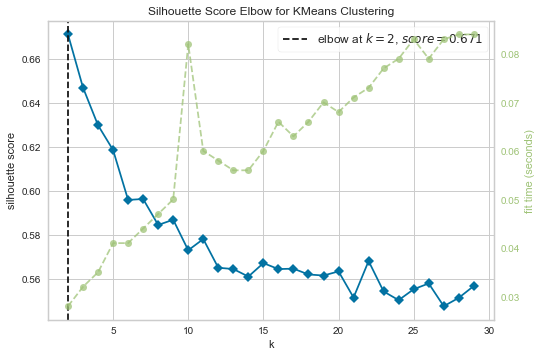

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

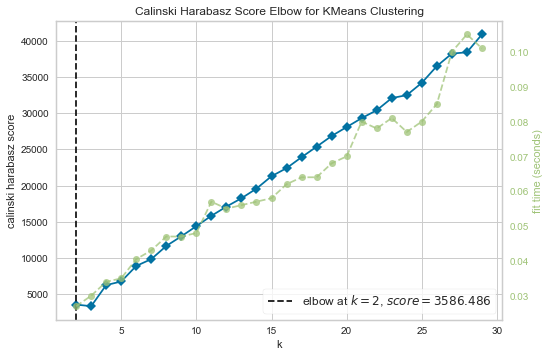

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure